In [24]:
#4.Use Autoencoder to implement anomaly detection. Build the model by using:
#a. Import required libraries
#b. Upload / access the dataset
#c. Encoder converts it into latent representation
#d. Decoder networks convert it back to the original input
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [25]:
#a. Import required libraries

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

In [22]:
#b. Upload / access the dataset

In [3]:
dataset = pd.read_csv("creditcard.csv")

In [4]:
# Preprocess the data (if needed)
# You may need to normalize the data, handle missing values, etc.
# For simplicity, we'll perform normalization in this example
# Normalize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X = scaler.fit_transform(dataset.drop("Class", axis=1))
y = dataset["Class"]

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [20]:
#c. Encoder converts it into latent representation

In [7]:
# Encoder
encoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu')
])

In [19]:
#d. Decoder networks convert it back to the original input

In [8]:
# Decoder
decoder = models.Sequential([
    layers.Input(shape=(16,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(input_dim, activation='linear')  # Using 'linear' activation for reconstruction
])

# Autoencoder
autoencoder = models.Sequential([
    encoder,
    decoder
])

In [18]:
#e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [9]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.4905 - val_loss: 0.1634
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1461 - val_loss: 0.1246
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0956 - val_loss: 0.0779
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0773 - val_loss: 0.0689
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0697 - val_loss: 0.0612
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0635 - val_loss: 0.0596
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0629 - val_loss: 0.0548
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0590 - val_loss: 0.0600
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0563 - val_loss: 0.0533
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0573 - val_loss: 0.0568


In [10]:
# Detect anomalies and tune the threshold
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


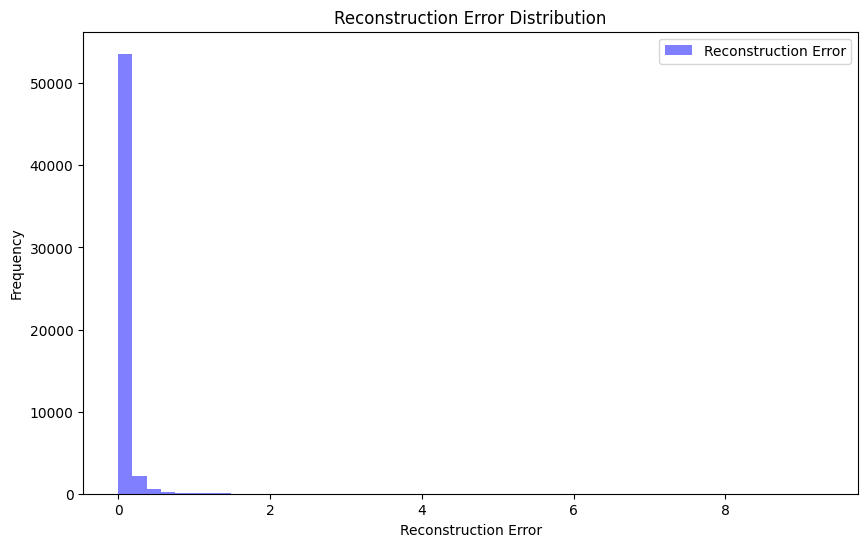

In [11]:
# Visualize the reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.5, color='b', label='Reconstruction Error')
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [12]:
# Threshold tuning (iterate and adjust as needed)
thresholds = np.arange(0.1, 1.0, 0.1)  # Adjust the step size as needed

for threshold in thresholds:
    anomalies = mse > threshold

In [13]:
# Count the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Threshold: {threshold:.1f}, Number of anomalies: {num_anomalies}")

Threshold: 0.9, Number of anomalies: 291


In [14]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, anomalies))

print("\nClassification Report:")
print(classification_report(y_test, anomalies))

Confusion Matrix:
[[56617   247]
 [   54    44]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.15      0.45      0.23        98

    accuracy                           0.99     56962
   macro avg       0.58      0.72      0.61     56962
weighted avg       1.00      0.99      1.00     56962



In [15]:
import seaborn as sns

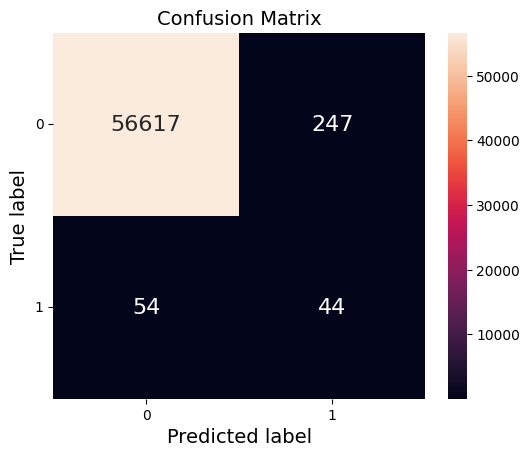

In [16]:
plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(y_test, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')
plt.xticks([0.5, 1.5],  rotation = 'horizontal')
plt.yticks([0.5, 1.5],  rotation = 'horizontal')
plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()